# Prediction model on MNIST

In [1]:
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D

2024-03-01 12:09:56.897493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading the MNIST dataset using keras and splitting it

In [2]:
# Loading data
data = mnist.load_data()

In [3]:
# Splitting the data
(X_train, Y_train), (X_test, Y_test) = data

In [4]:
# Checking data shape
print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)


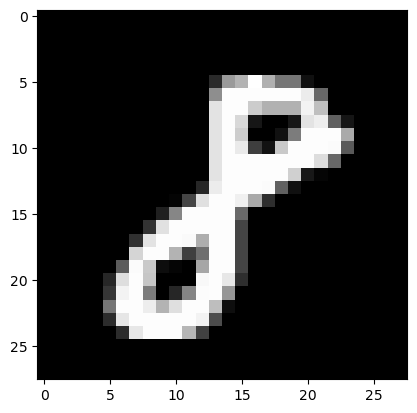

8


In [5]:
plt.imshow(X_train[31], cmap='gray')
plt.show()

print(Y_train[31])

## Data normalization

In [6]:
# Normalizing the images data
X_train  = X_train / 255
X_test  = X_test / 255

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
# Reshaping data to match the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
# Labels categorization
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [10]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Training the model

In [11]:
def my_model():
    model = Sequential()
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
model = my_model()

2024-03-01 12:09:59.124323: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
# model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=100)

In [14]:
# test_loss, test_acc = model.evaluate(X_test, Y_test)
# print('Test accuracy', test_acc)

## Other model with better performance

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
y_train.shape

(60000,)

In [18]:
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels)
x_test = x_test.reshape(x_test.shape[0], num_pixels)

In [19]:
x_train.shape

(60000, 784)

In [20]:
#Normalize inputs from [0; 255] to [0; 1]
x_train = x_train / 255
x_test = x_test / 255

In [21]:
#Convert class vectors to binary class matrices ("one hot encoding")
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

num_classes = y_train.shape[1]

In [22]:
y_train.shape

(60000, 10)

In [23]:
def neural_network():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [24]:
model = neural_network()
model.summary()
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
600/600 [==============================] - 27s 45ms/step - loss: 0.2344 - accuracy: 0.9324 - val_loss: 0.1198 - val_accuracy: 0.9659
Epoch 2/3
600/600 [==============================] - 9s 15ms/step - loss: 0.0908 - accuracy: 0.9732 - val_loss: 0.0914 - val_accuracy: 0.9719
Epoch 3/3
600/600 [==============================] - 18s 30ms/step - loss: 0.0564 - accuracy: 0.9834 - val_loss: 0.0702 - val_accuracy: 0.9785


In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9785
Test accuracy 0.9785000085830688


In [26]:
model.save('mnist_simple.keras')

## Make a prediction using my new trained model

In [27]:
# Choose the index of the image to predict on
image_index = 98

image = x_test[image_index]
image = image.reshape(1, num_pixels)

# Make the prediction
prediction = model.predict(image)

# Using argmax to return the class with highest probability
predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 79ms/step


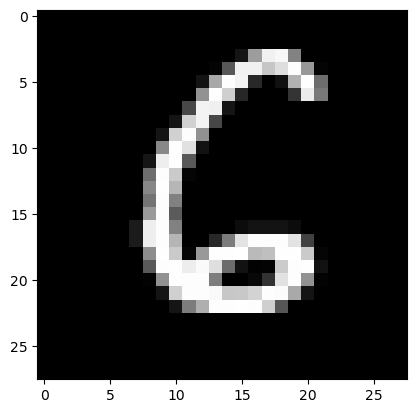

Predicted class: 6


In [28]:
image_to_plot = x_test[image_index].reshape(28, 28)

plt.imshow(image_to_plot, cmap='gray')
plt.show()

print("Predicted class:", predicted_class)